In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import simple_graph_modified as gs
import Homework04 as gss

In [2]:
img_size=  (520, 1000, 3) 

In [3]:
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[100:120, 100:480] = 0

h, w = img_size

# Number of grid divisions
rows, cols = h//20, w//20  # 4 horizontal parts, 6 vertical parts

# Draw horizontal lines
for i in range(1, rows):
    y = i * h // rows
    cv2.line(obstacle_1, (0, y), (w, y), (128, 128, 128), 1)  # green lines

# Draw vertical lines
for j in range(1, cols):
    x = j * w // cols
    cv2.line(obstacle_1, (x, 0), (x, h), (128, 128, 128), 1)
cv2.imshow("window", obstacle_1)
cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: too many values to unpack (expected 2)

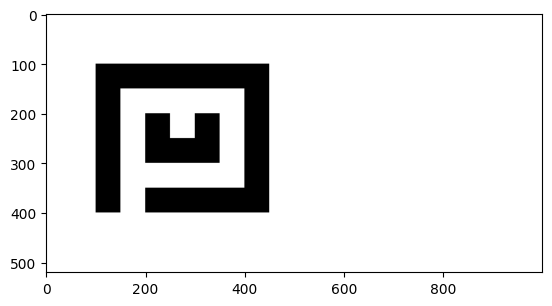

In [4]:
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[100:150, 100:450] = 0
obstacle_1[150:400, 150:150] = 0
obstacle_1[150:400, 400:450] = 0
obstacle_1[350:400, 200:400] = 0
obstacle_1[100:400, 100:150] = 0
obstacle_1[200:300, 200:250] = 0
obstacle_1[250:300, 250:300] = 0
obstacle_1[200:300, 300:350] = 0
plt.imshow(obstacle_1, cmap='gray')

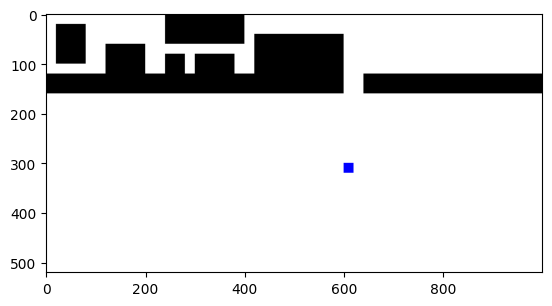

In [3]:
# obstacle_1[180:200, 20:40] = 0
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[20:100, 20:80] = [0,0,0]
obstacle_1[60:120, 120:200] = [0,0,0]
obstacle_1[0:60, 240:400] = [0,0,0]
obstacle_1[0:60, 240:400] = [0,0,0]
obstacle_1[80:120, 240:280] = [0,0,0]
obstacle_1[80:120, 240:280] = [0,0,0]
obstacle_1[80:120, 300:380] = [0,0,0]
obstacle_1[40:120, 420:600] = [0,0,0]


obstacle_1[120:160, 0:600] = [0,0,0]
obstacle_1[120:160, 640:1000] = [0,0,0]
obstacle_1[120:160, 640:1000] = [0,0,0]

obstacle_1[300:320, 600:620] = [0,0,255]


# obstacle_1[350:400, 200:400] = 0
# obstacle_1[100:400, 100:150] = 0
# obstacle_1[200:300, 200:250] = 0
# obstacle_1[250:300, 250:300] = 0
# obstacle_1[200:300, 300:350] = 0

plt.imshow(obstacle_1)

In [41]:
(obstacle_1[120:160, 0:600]).sum()

np.uint64(0)

In [63]:
cv2.imshow("window", obstacle_1[:120, :200])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
map = obstacle_1[:100, :100]


In [175]:
map1 = obstacle_1[:120, :200]


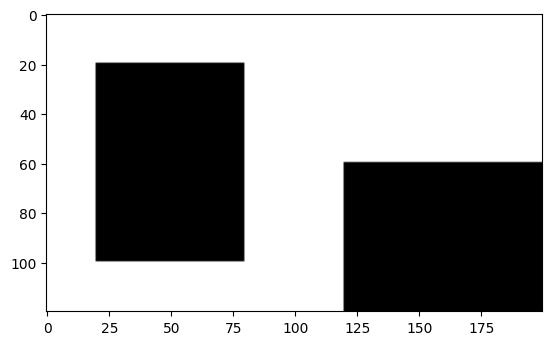

In [65]:
plt.imshow(map1, cmap='gray')

In [4]:
obstacle_1[0: 10, 0:10].sum()%255

np.uint64(0)

In [5]:
left, right = np.arange(0, img_size[1], 10), np.arange(10, img_size[1]+10, 10)


In [12]:
map.shape

(100, 100)

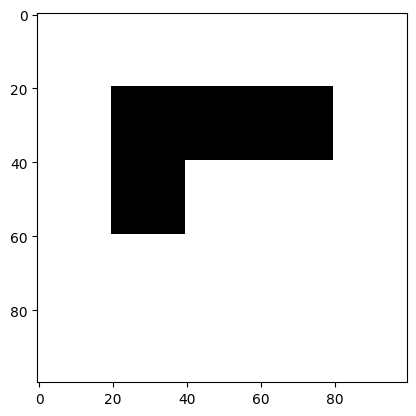

In [9]:
plt.imshow(map, cmap='gray')

In [ ]:
# id = 0
# blocks = {}
# points = []
# kernel_size = 20
# stride = 20
# img_size = map.shape

# def check_if_obstacle(node):
#     # Check if the node is an obstacle
#     if node.sum() == 0:
#         return True
#     return False

# # def is_internal_block(id, total_columns):
# #     # if left or right boundary return an invalid id
# #     if id!=1 and (id%total_columns==0 or (id+1)%total_columns==0):
# #         return False
# #     else:
# #         return True

# def block_position(id, total_columns):
#     # if left or right boundary return an invalid id
#     if id!=1 and id%total_columns==0:
#         return "left"
#     elif id!=1 and (id+1)%total_columns==0:
#         return "right"
#     else:
#         return "center"


# def set_neighbors(blocks, block, id, w, stride):
#     total_columns = w//stride
#     top = blocks.get(id-total_columns, None)
#     top_left = None
#     top_right = None
#     left = None
#     right = None
#     current_block_position = block_position(id, total_columns)
#     if current_block_position=="center":
#         top_left = blocks.get(id-total_columns-1, None)
#         top_right = blocks.get(id-total_columns+1, None)
#         left = blocks.get(id-1, None)
#         right = blocks.get(id+1, None)
#     elif current_block_position=="left":
#         top_right = blocks.get(id-total_columns+1, None)
#     else:
#         left = blocks.get(id-1, None)
#         top_left = blocks.get(id-total_columns-1, None)
        
#     neighbors = [top_left, top, top_right, left, right]
#     # for neighbor in neighbors:
#     #     if neighbor is not None:
#     #         print(id, neighbor.id())
#     #     else:
#     #         print(id, neighbor)
#     for neighbor in neighbors:
#         if neighbor is not None and not neighbor.isWall():
#             block.addUndirectedNeighbor(neighbor)
            
# # i=0
# # for j in range(img_size[1]//stride):
# #     block = gs.Node(id=id, y1=stride * i, y2=kernel_size +  stride * i, x1=stride * j, x2=kernel_size + stride * j)
# #     if check_if_obstacle(map[ stride * i: kernel_size +  stride * i,  stride * j: kernel_size + stride * j]):
# #         block.setWall(True)
# #     else:
# #         block.setWall(False)
# #         set_neighbors(blocks, block, id, w, stride)
# #     blocks[id] = block
# #     id+=1
# # w,h = img_size
# for i in range(w//stride):
#     for j in range(h//stride):
#         block = gs.Node(id=id, y1=stride * i, y2=kernel_size +  stride * i, x1=stride * j, x2=kernel_size + stride * j)
#         if check_if_obstacle(map[ stride * i: kernel_size +  stride * i,  stride * j: kernel_size + stride * j]):
#             block.setWall(True)
#         else:
#             block.setWall(False)
#             set_neighbors(blocks, block, id, w, stride)
#         blocks[id] = block
#         id+=1
        

In [47]:
obstacle_1.shape

(520, 1000)

In [4]:

def check_if_obstacle(node):
    # Check if the node is an obstacle
    if node.sum() == 0:
        return True
    return False

def block_position(id, total_columns):
    # if left or right boundary return an invalid id
    if id!=1 and id%total_columns==0:
        return "left"
    elif id!=1 and (id+1)%total_columns==0:
        return "right"
    else:
        return "center"


def set_neighbors(blocks, block, id, w, stride):
    total_columns = w//stride
    top = blocks.get(id-total_columns, None)
    top_left = None
    top_right = None
    left = None
    right = None
    current_block_position = block_position(id, total_columns)
    if current_block_position=="center":
        top_left = blocks.get(id-total_columns-1, None)
        top_right = blocks.get(id-total_columns+1, None)
        left = blocks.get(id-1, None)
        right = blocks.get(id+1, None)
    elif current_block_position=="left":
        top_right = blocks.get(id-total_columns+1, None)
    else:
        left = blocks.get(id-1, None)
        top_left = blocks.get(id-total_columns-1, None)
        
    neighbors = [top_left, top, top_right, left, right]

    for neighbor in neighbors:
        if neighbor is not None and not neighbor.isWall():
            block.addUndirectedNeighbor(neighbor)
            

def construct_graph(img):
    id = 0
    blocks = {}
    kernel_size = 20
    stride = 20
    w,h,c = img.shape
    for i in range(w//stride):
        for j in range(h//stride):
            block = gs.Node(id=id, y1=stride * i, y2=kernel_size +  stride * i, x1=stride * j, x2=kernel_size + stride * j)
            if check_if_obstacle(img[ stride * i: kernel_size +  stride * i,  stride * j: kernel_size + stride * j]):
                block.setWall(True)
            else:
                block.setWall(False)
                set_neighbors(blocks, block, id, h, stride)
            blocks[id] = block
            id+=1
    return blocks
blocks = construct_graph(obstacle_1)

In [163]:
map1.shape

(120, 200, 3)

In [166]:
for g in blocks.values():
    print(g)

0 (0, 20, 0, 20, False) inf -> -1
1 (0, 20, 20, 40, False) inf -> -1
2 (0, 20, 40, 60, False) inf -> -1
3 (0, 20, 60, 80, False) inf -> -1
4 (0, 20, 80, 100, False) inf -> -1
5 (0, 20, 100, 120, False) inf -> -1
6 (0, 20, 120, 140, False) inf -> -1
7 (0, 20, 140, 160, False) inf -> -1
8 (0, 20, 160, 180, False) inf -> -1
9 (0, 20, 180, 200, False) inf -> -1
10 (20, 40, 0, 20, False) inf -> -1
11 (20, 40, 20, 40, True) inf -> -1
12 (20, 40, 40, 60, True) inf -> -1
13 (20, 40, 60, 80, True) inf -> -1
14 (20, 40, 80, 100, False) inf -> -1
15 (20, 40, 100, 120, False) inf -> -1
16 (20, 40, 120, 140, False) inf -> -1
17 (20, 40, 140, 160, False) inf -> -1
18 (20, 40, 160, 180, False) inf -> -1
19 (20, 40, 180, 200, False) inf -> -1
20 (40, 60, 0, 20, False) inf -> -1
21 (40, 60, 20, 40, True) inf -> -1
22 (40, 60, 40, 60, True) inf -> -1
23 (40, 60, 60, 80, True) inf -> -1
24 (40, 60, 80, 100, False) inf -> -1
25 (40, 60, 100, 120, False) inf -> -1
26 (40, 60, 120, 140, False) inf -> -1
27 

In [50]:
map1.shape

(120, 200, 3)

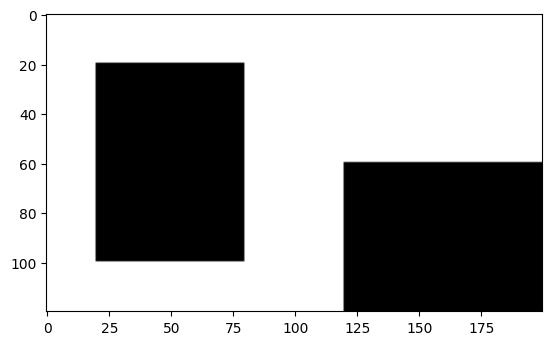

In [51]:
plt.imshow(map1)

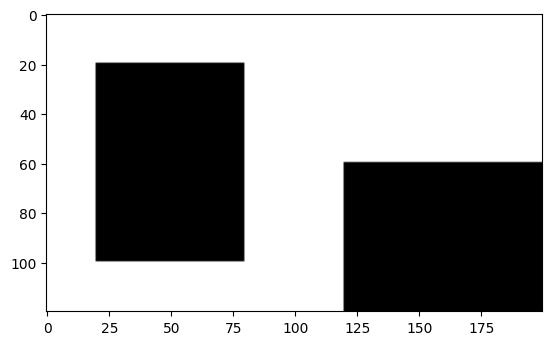

In [ ]:
import time
dummy = map1.copy()

for n in blocks[58].neighbors():
    y1, y2, x1, x2 = n.get_coordinates()
    dummy[y1:y2, x1:x2] = [128,128, 128]
plt.imshow(dummy)

In [195]:
import cv2
import numpy as np

dummy = map1.copy()

for i in range(len(blocks)):
    for n in blocks[i].neighbors():
        y1, y2, x1, x2 = n.get_coordinates()
        dummy[y1:y2, x1:x2] = [128, 128, 128]

        # OpenCV expects BGR, matplotlib usually is RGB
        frame = cv2.cvtColor(dummy, cv2.COLOR_RGB2BGR)

        cv2.imshow("Step", frame)

        # Wait 100 ms, press 'q' to exit early
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break

    dummy = map1.copy()

cv2.destroyAllWindows()


In [168]:
[n.id() for n in blocks[0].neighbors()]

[1, 10]

In [80]:
block_position(10, 200//20)

'left'

In [89]:
# obstacle_1[300:320, 600:620] = 0 15
blocks[450].get_coordinates()

(180, 200, 0, 20)

In [17]:
test = np.zeros_like(obstacle_1)

In [20]:
obstacle_2 = obstacle_1.copy()
obstacle_2[100:120, 700:720] = 10

In [22]:
get_index_from_coordinates((120, 140, 600, 620), 20, 1000)

330

In [30]:
blocks[330].get_coordinates()

(120, 140, 600, 620)

In [31]:
check_if_obstacle(obstacle_1[120:140, 600:620])

False

In [26]:
for n in blocks[330].neighbors():
    print(n.id())

331


In [27]:
get_index_from_coordinates((100, 120, 600, 620), 20, 1000)

280

In [29]:
for n in blocks[280].neighbors():
    print(n.id())

253
254
255
281


In [28]:
blocks[280].visited()

True

In [23]:
blocks[330].visited()

False

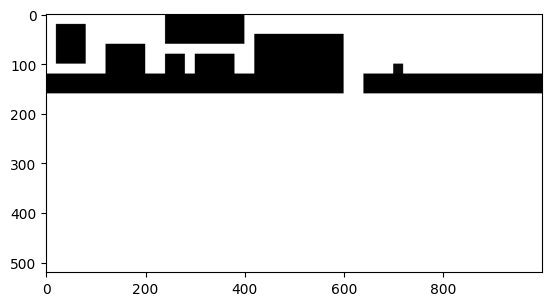

In [21]:
plt.imshow(obstacle_2, cmap='gray')

Found block with key: 285


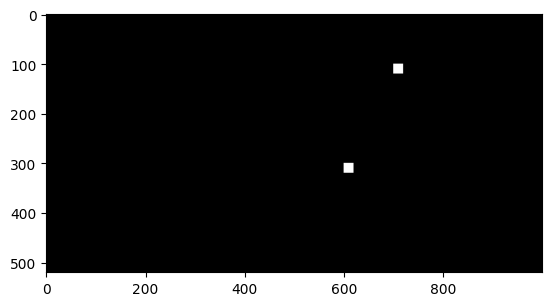

In [19]:
for key, block in blocks.items():
    if block.get_coordinates() == (100, 120, 700, 720):
        test[100:120, 700:720] = 255
        print("Found block with key: %s" % (key))
        break
plt.imshow(test, cmap='gray')

In [15]:
blocks[285].get_coordinates()

(100, 120, 700, 720)

In [5]:
def get_index_from_coordinates(coords, stride, w):
    i, j = coords[0]//stride, coords[2]//stride
    return i * (w // stride) + j

In [97]:
get_index_from_coordinates(blocks[780].get_coordinates(), 20, 1000)

780

In [6]:
source_coords = (0,20, 0, 20)
target_coords = (300,320, 600, 620)
source_index = get_index_from_coordinates(source_coords, 20, 1000)
target_index = get_index_from_coordinates(target_coords, 20, 1000)
source_index, target_index
blocks[source_index].setIsSource(True)
blocks[target_index].setIsTarget(True)

In [29]:
blocks[0].isSource(), blocks[780].isTarget()

(True, True)

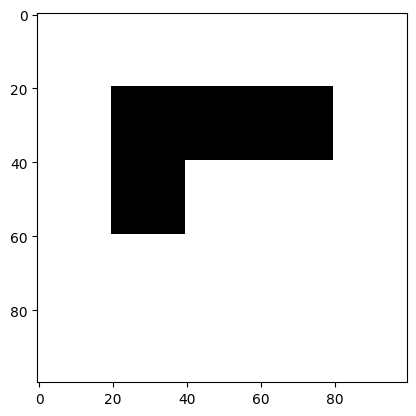

In [139]:
plt.imshow(map, cmap="gray")

In [7]:
img_copy = obstacle_1.copy()
gss.bfs_explore(blocks.values(), blocks[0], verbose=True, img=img_copy)

Node 0 pre: 0 parent 0
Node 1 pre: 1 parent 1
Node 50 pre: 2 parent 50
Node 2 pre: 3 parent 2
Node 100 pre: 4 parent 100
Node 3 pre: 5 parent 3
Node 150 pre: 6 parent 150
Node 4 pre: 7 parent 4
Node 54 pre: 8 parent 54
Node 200 pre: 9 parent 200
Node 5 pre: 10 parent 5
Node 55 pre: 11 parent 55
Node 104 pre: 12 parent 104
Node 105 pre: 13 parent 105
Node 250 pre: 14 parent 250
Node 251 pre: 15 parent 251
Node 6 pre: 16 parent 6
Node 56 pre: 17 parent 56
Node 106 pre: 18 parent 106
Node 154 pre: 19 parent 154
Node 155 pre: 20 parent 155
Node 252 pre: 21 parent 252
Node 7 pre: 22 parent 7
Node 57 pre: 23 parent 57
Node 107 pre: 24 parent 107
Node 204 pre: 25 parent 204
Node 205 pre: 26 parent 205
Node 253 pre: 27 parent 253
Node 8 pre: 28 parent 8
Node 58 pre: 29 parent 58
Node 108 pre: 30 parent 108
Node 254 pre: 31 parent 254
Node 255 pre: 32 parent 255
Node 9 pre: 33 parent 9
Node 59 pre: 34 parent 59
Node 109 pre: 35 parent 109
Node 10 pre: 36 parent 10
Node 60 pre: 37 parent 60
Node

In [13]:
blocks[285].visited()

True

In [14]:
graph[1236].get_coordinates()

NameError: name 'graph' is not defined

In [15]:
graph[128900].visited()

NameError: name 'graph' is not defined

In [8]:
node = blocks[780]
while node.parent()!=-1:
    # print(node.parent().id())
    node = node.parent()
    y1, y2, x1,x2 = node.get_coordinates()
    img_copy[y1:y2, x1:x2] = [255, 255, 0]


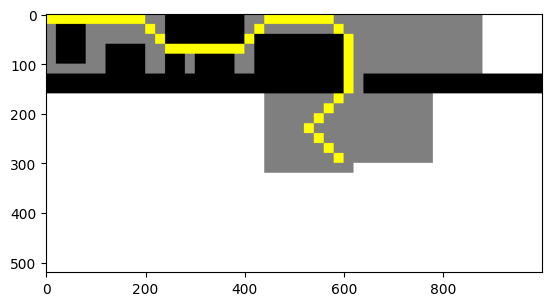

In [32]:
plt.imshow(img_copy, cmap='gray')

In [9]:
def euclidean_distance(y1, x1, y2, x2, stride):
    return ((((y2-y1)**2) + ((x2-x1)**2))**0.5)/stride

In [10]:
def get_coordinate_midpoints(y1,y2, x1,x2):
    return (y1+y2)/2 , (x1+x2)/2

In [16]:
get_coordinate_midpoints(120, 140, 20, 40)

(130.0, 30.0)

In [24]:
euclidean_distance(*get_coordinate_midpoints(120, 140, 20, 40), *get_coordinate_midpoints(160, 180, 20, 40), stride=20)

2.0

In [ ]:
# import heapq



# def a_star(graph, target_coords):
#     target_coords = get_coordinate_midpoints(*target_coords)
#     for node in graph:
#         node.setParent(None)
#         node.setCost(float("inf"))     
#         node.setHeuristicCost(float("inf"))
#         node.setVisited(False)

#     start = graph[0]
#     start.setCost(0)
#     start.setHeuristicCost(
#         euclidean_distance(
#             *get_coordinate_midpoints(*start.get_coordinates()),
#             *target_coords,
#             stride=20
#         )
#     )
#     queue = []
#     heapq.heappush(queue, (start.cost() + start.getHeuristicCost(), start.id(), start))  # f = g + h
#     match_found = False
#     search_coords = []
#     while queue:
#         _, id, current = heapq.heappop(queue)

#         if current.visited():
#             continue
#         current.setVisited(True)

#         current_coords = get_coordinate_midpoints(*current.get_coordinates())

#         # Goal check (if coords match target)
#         if current_coords == target_coords:
#             match_found = True
#             break

#         for neighbor in current.neighbors():
#             neighbor_block_coords = neighbor.get_coordinates()
#             neighbor_coords = get_coordinate_midpoints(*neighbor_block_coords)

#             known_cost = current.cost() + euclidean_distance(*current_coords, *neighbor_coords, stride=20)
#             if not neighbor.visited() and known_cost < neighbor.cost():
#                 search_coords.append((neighbor_block_coords))
#                 heruistic_cost = euclidean_distance(*neighbor_coords, *target_coords, stride=20)
#                 neighbor.setCost(known_cost)
#                 neighbor.setHeuristicCost(heruistic_cost)
#                 neighbor.setParent(current)
#                 new_cost = known_cost + heruistic_cost
#                 heapq.heappush(queue, (new_cost, neighbor.id(), neighbor))
#     return match_found, search_coords


In [17]:
import heapq



def a_star(graph, target_coords, include_heruistic=True):
    target_coords = get_coordinate_midpoints(*target_coords)
    for node in graph:
        node.setParent(None)
        node.setCost(float("inf"))
        if include_heruistic:     
            node.setHeuristicCost(float("inf"))
        node.setVisited(False)

    start = graph[0]
    start.setCost(0)
    if include_heruistic:
        start.setHeuristicCost(
            euclidean_distance(
                *get_coordinate_midpoints(*start.get_coordinates()),
                *target_coords,
                stride=20
            )
        )
    queue = []
    heapq.heappush(queue, (start.cost() + start.getHeuristicCost() if include_heruistic else start.cost(), start.id(), start))  # f = g + h
    match_found = False
    search_coords = []
    while queue:
        _, id, current = heapq.heappop(queue)

        if current.visited():
            continue
        current.setVisited(True)

        current_coords = get_coordinate_midpoints(*current.get_coordinates())

        # Goal check (if coords match target)
        if current_coords == target_coords:
            match_found = True
            break

        for neighbor in current.neighbors():
            neighbor_block_coords = neighbor.get_coordinates()
            neighbor_coords = get_coordinate_midpoints(*neighbor_block_coords)

            known_cost = current.cost() + euclidean_distance(*current_coords, *neighbor_coords, stride=20)
            if not neighbor.visited() and known_cost < neighbor.cost():
                search_coords.append((neighbor_block_coords))
                neighbor.setCost(known_cost)
                neighbor.setParent(current)
                if include_heruistic:
                    heruistic_cost = euclidean_distance(*neighbor_coords, *target_coords, stride=20)
                    neighbor.setHeuristicCost(heruistic_cost)
                    new_cost = known_cost + heruistic_cost
                else:
                    new_cost = known_cost
                    
                heapq.heappush(queue, (new_cost, neighbor.id(), neighbor))
    return match_found, search_coords


In [159]:
graph[1238].get_coordinates()

(190, 200, 220, 230)

In [58]:
graph = []
graph.append(gs.Node(0, 100, 120, 100, 120))
graph.append(gs.Node(1, 200, 220, 200, 220))
graph.append(gs.Node(2, 760, 780, 760, 780))
graph.append(gs.Node(3, 560, 580, 560, 580))
graph.append(gs.Node(4, 400, 420, 400, 420))

graph[0].addUndirectedNeighbor(graph[1])
graph[1].addUndirectedNeighbor(graph[2])
graph[1].addUndirectedNeighbor(graph[4])
graph[2].addUndirectedNeighbor(graph[3])
graph[3].addUndirectedNeighbor(graph[4])

In [59]:
a_star(graph, target_coords = (400, 420, 400, 420))

In [60]:
for node in graph:
    print(node.id(), node.visited())

0 True
1 True
2 False
3 False
4 True


In [35]:
graph = list(blocks.values())
img_cpy = obstacle_1.copy()
res, search_coords = a_star(graph, target_coords = (300,320, 600, 620))

In [18]:
graph[780].visited()

True

In [19]:
search_coords

[(0, 20, 20, 40),
 (20, 40, 0, 20),
 (0, 20, 40, 60),
 (0, 20, 60, 80),
 (0, 20, 80, 100),
 (20, 40, 80, 100),
 (0, 20, 100, 120),
 (20, 40, 100, 120),
 (40, 60, 80, 100),
 (40, 60, 100, 120),
 (20, 40, 120, 140),
 (40, 60, 120, 140),
 (60, 80, 80, 100),
 (60, 80, 100, 120),
 (0, 20, 100, 120),
 (0, 20, 120, 140),
 (20, 40, 120, 140),
 (40, 60, 0, 20),
 (20, 40, 140, 160),
 (40, 60, 140, 160),
 (0, 20, 120, 140),
 (0, 20, 140, 160),
 (20, 40, 140, 160),
 (20, 40, 160, 180),
 (40, 60, 160, 180),
 (0, 20, 140, 160),
 (0, 20, 160, 180),
 (20, 40, 160, 180),
 (20, 40, 180, 200),
 (40, 60, 180, 200),
 (0, 20, 160, 180),
 (60, 80, 80, 100),
 (0, 20, 180, 200),
 (20, 40, 180, 200),
 (20, 40, 200, 220),
 (40, 60, 200, 220),
 (60, 80, 200, 220),
 (80, 100, 80, 100),
 (80, 100, 100, 120),
 (40, 60, 220, 240),
 (60, 80, 220, 240),
 (80, 100, 200, 220),
 (80, 100, 220, 240),
 (60, 80, 240, 260),
 (100, 120, 200, 220),
 (100, 120, 220, 240),
 (0, 20, 180, 200),
 (0, 20, 200, 220),
 (20, 40, 200, 22

In [36]:
for coord in search_coords:
    y1, y2, x1,x2 = coord
    img_cpy[y1:y2, x1:x2] = [127, 127, 127]

In [37]:
node = graph[780]
while node.parent()!=-1 and node.parent() is not None:
    print(node.parent().id())
    node = node.parent()
    y1, y2, x1,x2 = node.get_coordinates()
    img_cpy[y1:y2, x1:x2] = [255, 255, 0]

730
680
630
580
530
480
430
380
330
280
230
180
130
79
78
77
76
75
74
73
72
71
120
169
168
167
166
165
164
163
162
161
160
109
108
107
106
105
54
3
2
1
0


In [38]:
graph = list(blocks.values())
img_cpy1 = obstacle_1.copy()
res, search_coords = a_star(graph, target_coords = (300,320, 600, 620), include_heruistic=False)

In [39]:
for coord in search_coords:
    y1, y2, x1,x2 = coord
    img_cpy1[y1:y2, x1:x2] = [127, 127, 127]

In [41]:
node = graph[780]
while node.parent()!=-1 and node.parent() is not None:
    print(node.parent().id())
    node = node.parent()
    y1, y2, x1,x2 = node.get_coordinates()
    img_cpy1[y1:y2, x1:x2] = [255, 255, 0]

730
680
630
580
530
480
430
380
330
280
230
180
130
79
78
77
76
75
74
73
72
71
120
169
168
167
166
165
164
163
162
111
110
109
108
57
6
5
4
3
2
1
0


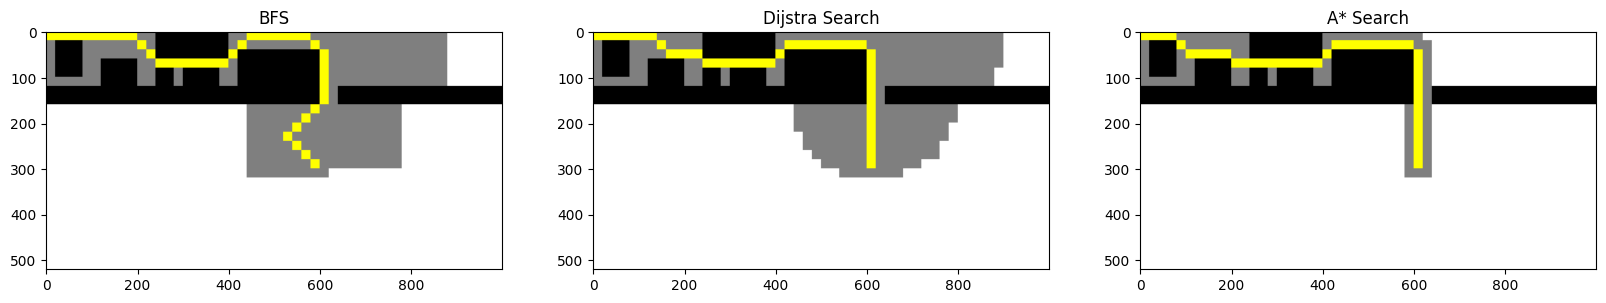

: 

In [ ]:
plt.figure(figsize=(20,35))
plt.subplot(131)
plt.title('BFS')
plt.imshow(img_copy)
plt.subplot(132)
plt.title('Dijstra Search')
plt.imshow(img_cpy1)
plt.subplot(133)
plt.title('A* Search')
plt.imshow(img_cpy)